# A. Найди ближайщего

Давайте вспомним небольшую разницу между типами данных `list()` и `numpy.array()`.

In [ ]:
[7, -1, 8] #list
[10, 2, 30] #list

[7, -1, 8, 10, 2, 30] # result list+list

[7, -1, 8] # numpy array
[10, 2, 30] # numpy array

[17, 1, 38] # result numpy array + numpy array

In [ ]:
import numpy as np

def get_nearest(a, a0): # a0 = 0
    idx = np.abs(a - a0).argmin()
    return a[idx]

B = np.array(list(map(int, input().split())))

print(get_nearest(B,0))
# 27 14 22 12 -22 -35 -40 -33 35 -43 -1

27 14 22 12 -22 -35 -40 -33 35 -43 -1
-1


**Разберем решение по шагам**

In [ ]:
B = np.array(list(map(int, input().split())))

# '1 2 4 1 -1' - input() - считываем с входного потока данные
# ['1', '2','2','4','1','-1'] - input().split() - разделяем ввод по пробелу
# [1, 2, 2, 4, 1, -1] - list(map(int, input().split())) - преобразуем элементы в числа

B

27 14 22 12 -22 -35 -40 -33 35 -43 -1


array([ 27,  14,  22,  12, -22, -35, -40, -33,  35, -43,  -1])

`np.abs(B - 0).argmin()`

По сути мы вычитаем из каждого элемента массива a0 (в нашем случае a0 = 0).

**Почему так?** Потому что ближайщий - это тот, до которого расстояние минимально. когда у нас есть только ось $Х$ (т.е. одномерный массив), то расстояние от точки до точки находиться по формуле: $|x1-x2|$

In [ ]:
idx = np.abs(B - 0).argmin()
# 27 14 22 12 -22 -35 -40 -33 35 -43 -1
# 0  0  0  0  0   0    0   0  0   0  0

10

# B. Шахматная доска

## 1 вариант решения

In [ ]:
import numpy as np

def checkerboard(n):
    a = np.resize([0,1], n) # np.resize - изменяет
    # [0,1] -> [0, 1, 0, 1, 0] (для n=5)
    return np.abs(a-np.array([a]).T)

N = int(input())

x = checkerboard(N)

for i in x:
    print(*i)

5
0 1 0 1 0
1 0 1 0 1
0 1 0 1 0
1 0 1 0 1
0 1 0 1 0


In [ ]:
n = 6
a = np.resize([0,1], n)
a

array([0, 1, 0, 1, 0, 1])

In [ ]:
print(*a)

0 1 0 1 0 1


In [ ]:
np.array([a]).T

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1]])

In [ ]:
np.abs(a - np.array([a]).T)

array([[0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0]])

## 2 вариант решения

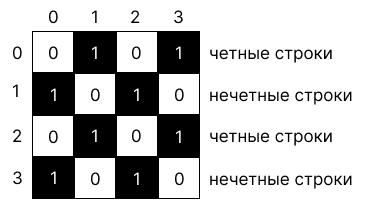

In [ ]:
N = 4
b = np.ones((N,N)) # создаем матрицу NxN, заполенненую 1
b

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [ ]:
# [start:stop-1:step] - срез
# [raw, column] - обращение к элементам матрицы
b[::2, ::2] = 0 # для четных строк
b[1::2, 1::2] = 0 # для нечетных строк
b

array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.]])

# C. Нулевая колонка

## 1 вариант решения

In [ ]:
import numpy as np

with open('input.txt') as file:
    x = np.array([[int(digit) for digit in line.split()] for line in file])

# 1 5 0 -4
# 1 4 8 7
# 9 0 0 -3

# [11, 9, 8, 8]
sums = x.sum(axis=0)

if 0 in sums:
    print(True)
else:
    print(False)

# В чем минус этого решения?

## 2 вариант решения

In [ ]:
import numpy as np

with open('input.txt') as file:
    x = np.array([[int(digit) for digit in line.split()] for line in file])

x == 0

array([[ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       [ True, False, False, False, False, False]])

In [ ]:
(x == 0).all(axis=0)

array([ True, False, False, False, False, False])

In [ ]:
# any() - хотя 1 True
# all() - все элементы True

In [ ]:
print((x == 0).all(axis=0).any())

True

# D. Симметричная матрица

In [ ]:
import numpy as np

def symetric(arr, tol=1e-8):
    return np.all(np.abs(arr-arr.T) == 0)

with open('input2.txt') as file:
    x = np.array([[int(digit) for digit in line.split()] for line in file])

print(symetric(x))

True


In [ ]:
x

array([[1, 2, 3, 4],
       [2, 8, 5, 6],
       [3, 5, 9, 7],
       [4, 6, 7, 0]])

In [ ]:
# cnt = 0
# for i in range(len(x)):
#     for j in range(len(x)):
#         if a[i,j] == a[j,i]:
#             cnt += 1

# cnt == 16:
# print(True)

In [ ]:
x.T

array([[1, 2, 3, 4],
       [2, 8, 5, 6],
       [3, 5, 9, 7],
       [4, 6, 7, 0]])

In [ ]:
np.abs(x - x.T)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
np.abs(x-x.T) == 0

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [ ]:
np.all(np.abs(x-x.T) == 0)

True

# E. Максимальная сумма в строке

In [ ]:
import numpy as np

# with open('input.txt') as file:
#     x = np.array([[int(digit) for digit in line.split()] for line in file])

x = np.array([[1,3,4], [0,4,2], [2,2,4]])
x

array([[1, 3, 4],
       [0, 4, 2],
       [2, 2, 4]])

In [ ]:
1+3+4 = 8
0+4+2 = 6
2+2+4 = 8

max = 8
index = 0, 2

In [ ]:
a = x.sum(axis=1)
# a = [8, 6, 8]

In [ ]:
a.argmax() # не подходит

0

In [ ]:
import numpy as np
# np.where(условие, что делать если условие выполнено, что делать если не выполнено)
b = np.array([1,0,7,1,0,8,0])

np.where(b==0)

(array([1, 4, 6]),)

In [ ]:
indx = np.where(a == np.max(a))
# a = [8, 6, 8]
# () - кортеж

(array([0, 2]),)

In [ ]:
print(*indx[0])

0 2


In [ ]:
a = x.sum(axis=1)
# [3, 10, 31]
# a == np.max(a) -> [False, False, True]
print(*np.where(a == np.max(a)))